<a href="https://colab.research.google.com/github/ab-rohman/Computer_Vision/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.0 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=a4d7108ef675d083733d299b5a7c4404942a188b9d4cdfbd2f5d354ef2c5b59d
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=009f9cdde316d5cd0fb4d1b181c011ff2bf10e723a87b2ffbb2ef2970da30cc2
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

In [ ]:
image = cv2.imread("/content/drive/MyDrive/PCVK/CAR/5.jpg")
box, label, count = cv.detect_common_objects(image)
output = draw_bbox(image, box, label, count)
plt.imshow(output)
plt.show()
print("Number of cars in this image are " +str(label.count('car')))

error: ignored

In [ ]:


image = cv2.imread("MyDrive/PCVK/1.jpg")
box, label, count = cv.detect_common_objects(image)
output = draw_bbox(image, box, label, count)
plt.imshow(output)
plt.show()
print("Number of cars in this image are " +str(label.count('car')))

AttributeError: ignored

In [ ]:
# import the necessary packages
import argparse
import imutils
import cv2
# construct the argument parser and parse the arguments
'''ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
args = vars(ap.parse_args())'''

'ap = argparse.ArgumentParser()\nap.add_argument("-i", "--image", required=True,\n\thelp="path to input image")\nargs = vars(ap.parse_args())'

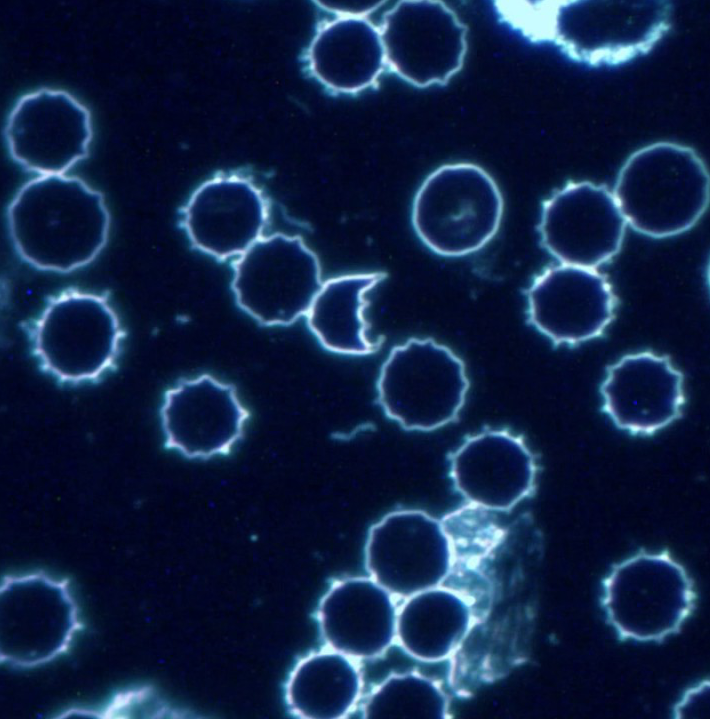

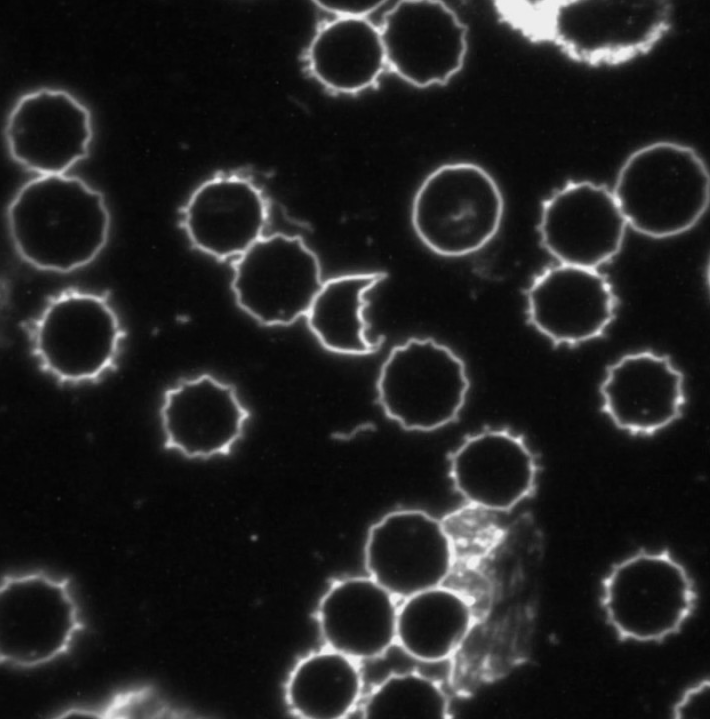

In [ ]:
# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread("/content/drive/MyDrive/PCVK/Bakteri/001.png")
#cv2.imshow("Image", image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)


# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

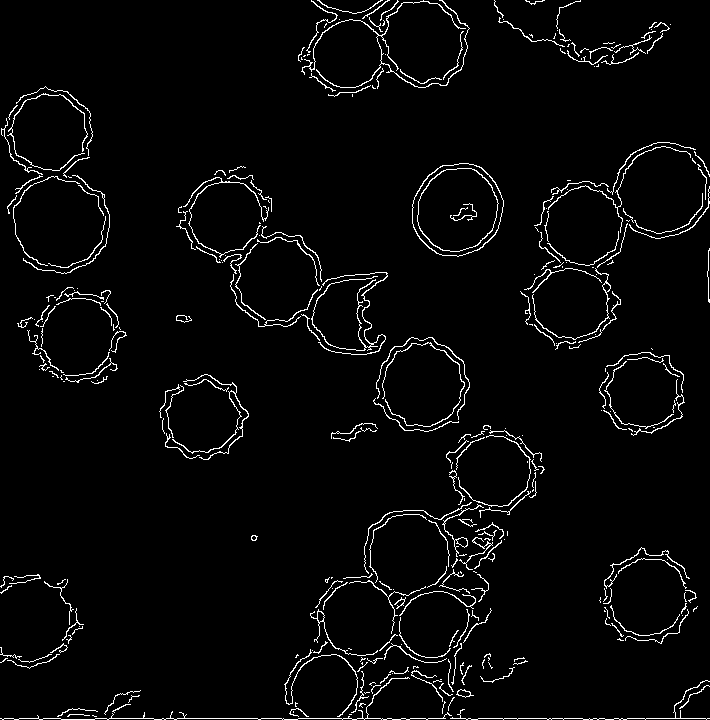

In [ ]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)

from google.colab.patches import cv2_imshow
cv2_imshow(edged)

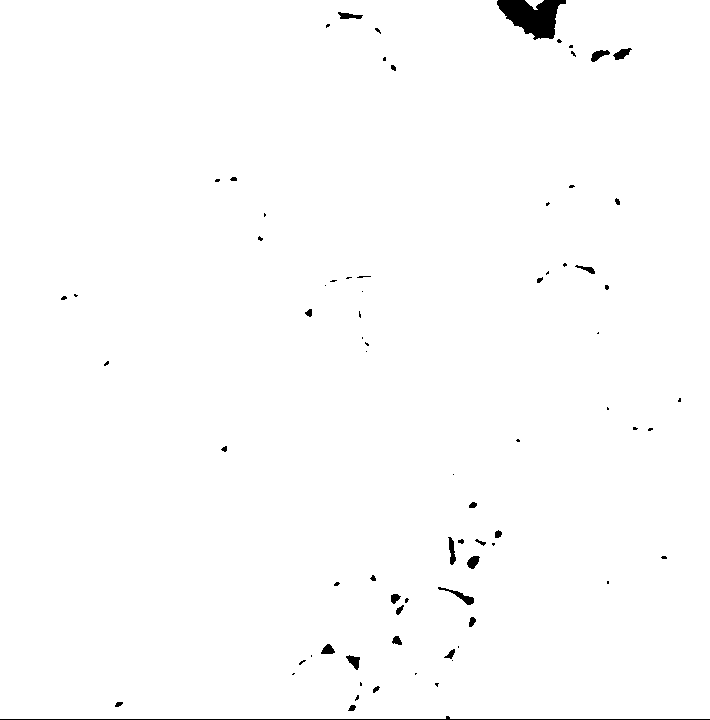

In [ ]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

from google.colab.patches import cv2_imshow
cv2_imshow(thresh)

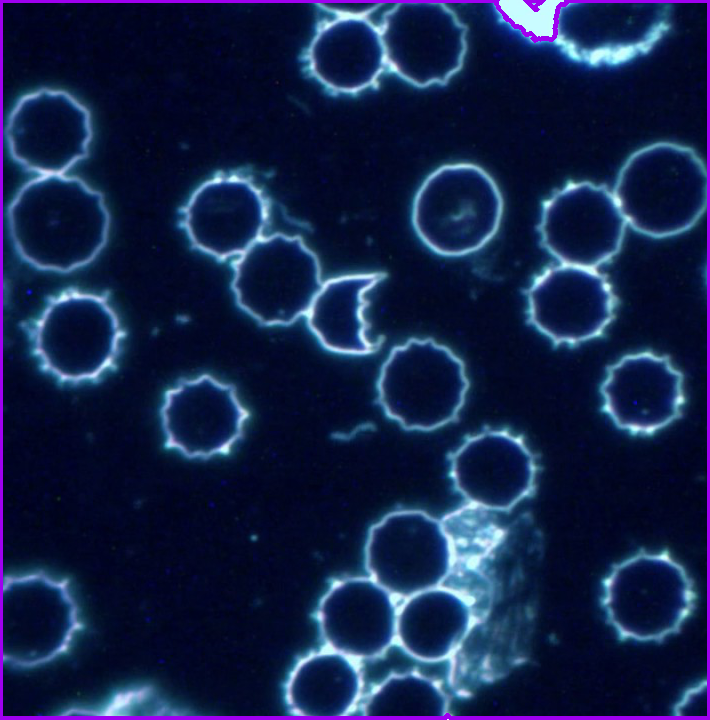

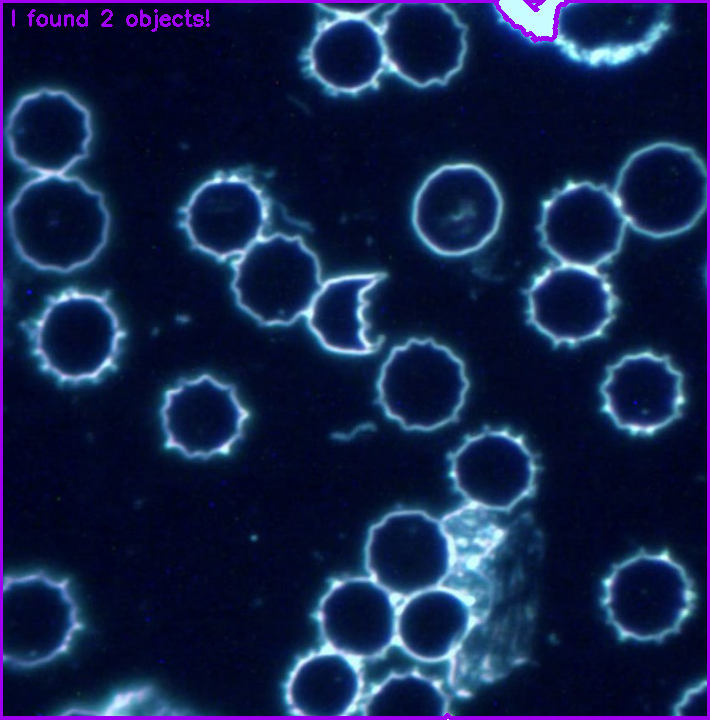

In [ ]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
cv2_imshow(output)

text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)
  

PAKE YG CARA LAIN



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

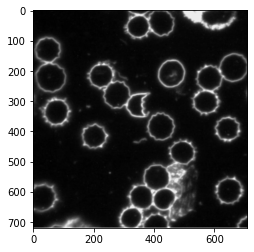

In [ ]:
# Get the image
image = cv2.imread("/content/drive/MyDrive/PCVK/Bakteri/001.png")

# Convert image to grayscale
grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayed_image, cmap='gray')

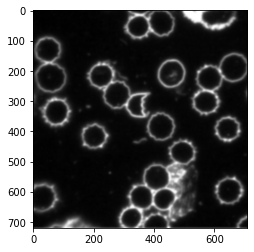

In [ ]:
# Blur the image so as to remove noise
blurred_image = cv2.GaussianBlur(grayed_image, (11,11), 0)
plt.imshow(blurred_image,cmap = 'gray')

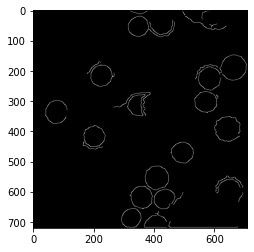

In [ ]:
# Use canny edge detection algorithm to detect the edges
canny = cv2.Canny(blurred_image, 30, 250, 3)
plt.imshow(canny, cmap='gray')

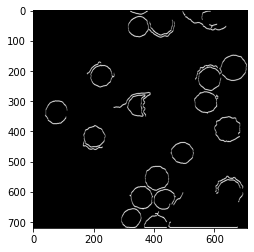

In [ ]:
# Dilate the image to thicken the edges
dilated_image = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated_image, cmap='gray')

In [ ]:
# Find contours from the above image
img, count, hierarchy = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw the contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, count, -1, (0,255,0), 2)
plt.imshow(rgb)

ValueError: ignored

In [ ]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [ ]:
class VehicleDetector:
    def __init__(self):
        # Load Network
        net = cv2.dnn.readNet("D:/Count number of vehicles in images/source code/dnn_model/yolov4.weights", 
                             "D:/Count number of vehicles in images/source code/dnn_model/yolov4.cfg")
        self.model = cv2.dnn_DetectionModel(net)
        self.model.setInputParams(size=(832,832), scale=1/255)
        
        # Allow classes containing cars and trucks only
        # Class 2 corresponds to cars while class 7 corresponds to trucks in yolo coco dataset
        self.classes_allowed = [2, 7]
        
    def detect_vehicles(self, img):
        # Detect Objects
        vehicle_boxes = []
        class_ids, scores, boxes = self.model.detect(img, nmsThreshold=0.4)
        
        for class_id, score, box in zip(class_ids, scores, boxes):
            # skip detection with low confidence score
            if score < 0.5:
                continue
            if class_id in self.classes_allowed:
                vehicle_boxes.append(box)
                
        return vehicle_boxes

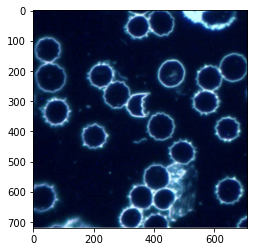

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
from PIL import Image
import cv2

image_path = "/content/drive/MyDrive/PCVK/Bakteri/001.png"

f1 = mp.imread(image_path)
plt.imshow(f1)

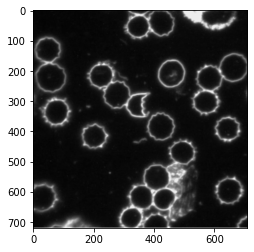

In [ ]:
col = Image.open(image_path)
gray_im = col.convert('L')

plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)

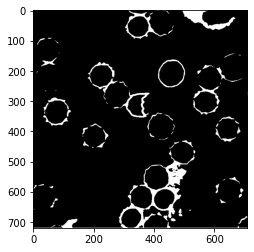

In [ ]:
img = cv2.imread(image_path,0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# global thresholding

#For Red Blood Cells 
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#For Neurons 
#ret1,th1 = cv2.threshold(img,225,255,cv2.THRESH_BINARY) 

plt.imshow(th1, cmap="gray", vmin=0, vmax=255)

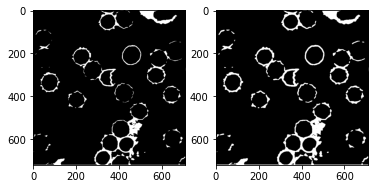

In [ ]:
kernel = np.ones((3,3),np.uint8)

dilate = cv2.dilate(th1,kernel,iterations = 1)
plt.figure; plt.subplot(1,2,1); plt.imshow(th1, cmap = 'gray'); 
plt.subplot(1,2,2); plt.imshow(dilate, cmap = 'gray')

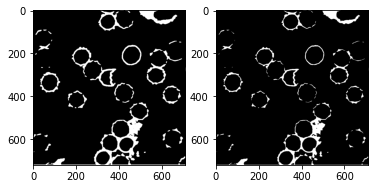

In [ ]:
erosion = cv2.erode(dilate,kernel,iterations = 1)
plt.figure; plt.subplot(1,2,1); plt.imshow(dilate, cmap = 'gray'); 
plt.subplot(1,2,2); plt.imshow(erosion, cmap = 'gray')

objects number is: 76


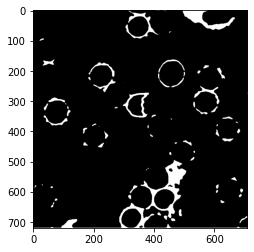

In [ ]:
img_processed = cv2.medianBlur(erosion, 7)
ret, labels = cv2.connectedComponents(img_processed)
print('objects number is:', ret-1)
plt.imshow(img_processed, cmap = 'gray')

In [ ]:
# Find contours from the above image
img, count, hierarchy = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw the contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, count, -1, (0,255,0), 2)
plt.imshow(rgb)

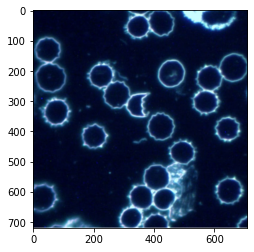

In [ ]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Bakteri/001.png")

#Image in Real Color
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

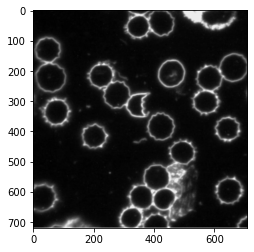

In [ ]:
#Showing image in gray color
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap ='gray')

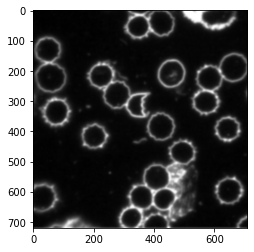

In [ ]:
#Make a blur image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(blur, cmap ='gray')

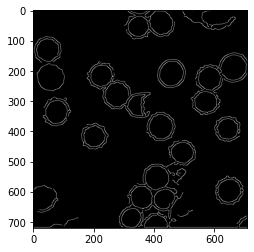

In [ ]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap ='gray')

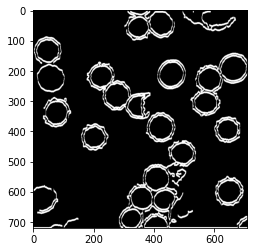

In [ ]:
dilated = cv2.dilate(canny, (1,1), iterations = 5)
plt.imshow(dilated, cmap ='gray')

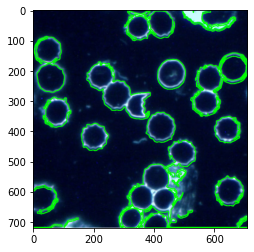

In [ ]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
plt.imshow(rgb)

In [ ]:
len(cnt)

28

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()    

In [ ]:
def color_counter(image, color = 'r'):
  try:
      print('Original size',image.shape)
  except AttributeError:
      print("shape not found")
   
  #BGR
  if color == 'r':
    lower_color_bounds = np.array([10,10,100])
    upper_color_bounds = np.array([150,100,255])
  elif color == 'w':  
    lower_color_bounds = np.array([240,240,240])
    upper_color_bounds = np.array([255,255,255])
  elif color == 'b':  
    lower_color_bounds = np.array([5,5,5])
    upper_color_bounds = np.array([90,90,90])  
  else:  
    print('INVALID COLOR')
    return 0

  mask = cv2.inRange(image,lower_color_bounds,upper_color_bounds)
  kernel = np.ones((10,10),np.float32)/100
  image_blur_gray = cv2.filter2D(mask,-1,kernel)
  image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)
  #display_one(image_thresh,'image thresh')

  kernel = np.ones((2,2),np.uint8)
  opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 
  #display_one(opening,'opening')

  last_image = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, last_image =  cv2.threshold(last_image, 0.03*last_image.max(),255,0)
  #display_one(last_image,'last image')

  last_image = last_image.astype(np.uint8)
  cnts = cv2.findContours(last_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]

  display(cv2.cvtColor(image,cv2.COLOR_BGR2RGB),last_image,'original','{} selected'.format(color))
  return(len(cnts)-1)

In [ ]:
def color_profile(image):
  display_one(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  r = color_counter(image,'r')
  g = color_counter(image, 'w')
  b = color_counter(image, 'b')
  print('{} red cars\n{} white cars\n{} black cars'.format(r,g,b))

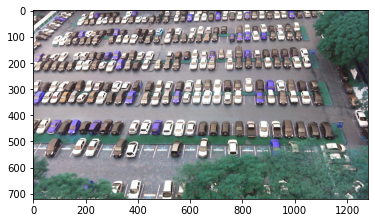

In [ ]:
imagetry = cv2.imread("/content/drive/MyDrive/PCVK/CAR/20.jpg")
plt.imshow(imagetry)

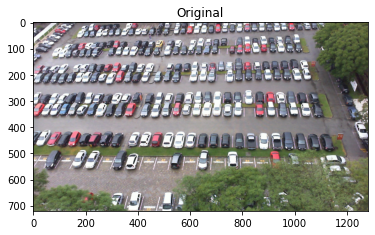

Original size (720, 1280, 3)


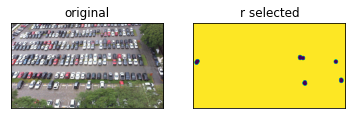

Original size (720, 1280, 3)


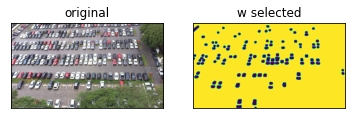

Original size (720, 1280, 3)


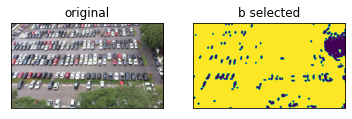

5 red cars
100 while cars
104 black cars


In [ ]:
color_profile(imagetry)

ini last ketemu

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as sk

from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

In [ ]:
def show(img):
    plt.imshow(img)
    plt.show()

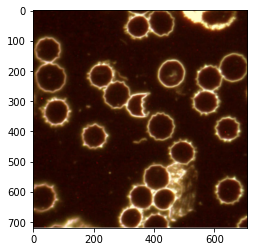

(720, 710, 3)


In [ ]:
#load
fp = "/content/drive/MyDrive/PCVK/Bakteri/001.png"
img = cv2.imread(fp)
show(img)
print(img.shape)

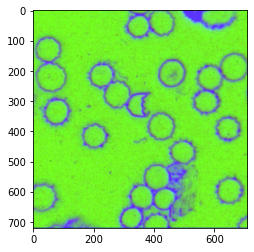

In [ ]:
#converting to HSV color model
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

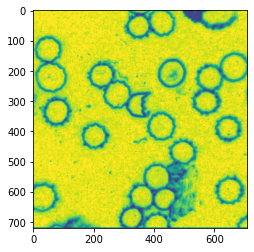

In [ ]:
h, s, v = cv2.split(hsv)
show(s)
# reference : https://stackoverflow.com/questions/34712144/merge-hsv-channels-under-opencv-3-in-python

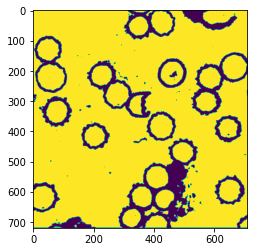

In [ ]:
_, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(thr)
# reference : https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/

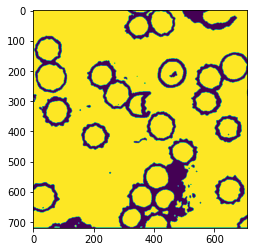

In [ ]:
#blurring the image
blur = cv2.medianBlur(thr, 5)
show(blur)

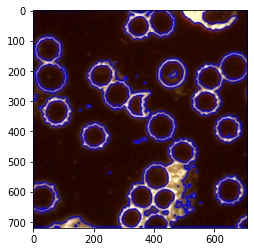

number of Bacteria found including error =  67


In [ ]:
copy1 = img.copy()
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy1, contours, -1, (0,0,255), 3)
show(copy1)
print("number of Bacteria found including error = ", len(contours))
#references: 
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html
#https://github.com/facebookresearch/maskrcnn-benchmark/issues/339 """

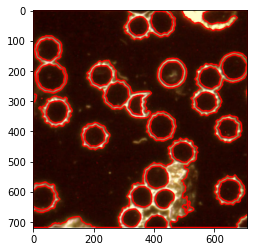

number of Bacteria found via contour detection =  32


In [ ]:
# arbitarily removing patches having area greater than 1000
copy2 = img.copy()
count = []
for x in contours:
    area = cv2.contourArea(x)
    if area > 1000 :
        count.append(x)
cv2.drawContours(copy2, count, -1, (255,0,0), 3)
show(copy2)
print("number of Bacteria found via contour detection = ", len(count))

In [14]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests 

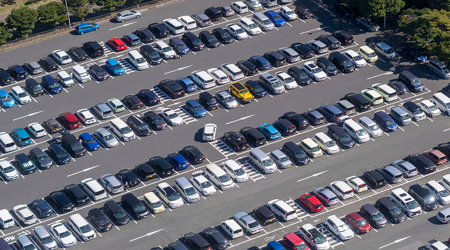

In [25]:
# Reading image form url
image = Image.open(requests.get('https://sofia-airport.eu/wp-content/uploads/2021/11/parking-t1-603x402-2.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

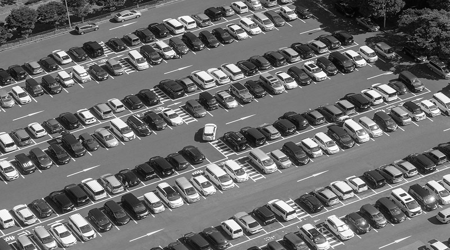

In [26]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

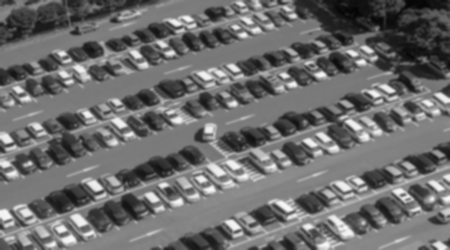

In [27]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

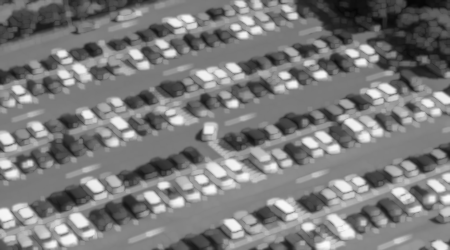

In [28]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

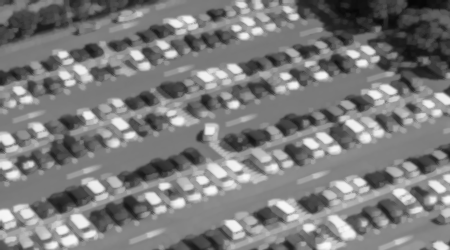

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [39]:
car_cascade_src = '/content/drive/MyDrive/PCVK/model/cas3.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[380,   5,  54,  27],
       [202,  10, 130,  65],
       [196,  35, 193,  96],
       [ 14,  28, 182,  90],
       [ 84,  35, 177,  88],
       [ 28,  20, 220, 110],
       [ 10,  61, 116,  58],
       [202,  68, 220, 110],
       [ 84, 112, 139,  69],
       [ 38,  85, 200, 100],
       [ 18, 128, 210, 105],
       [225, 152, 184,  92],
       [ 64, 129, 230, 115],
       [110, 167, 123,  61],
       [ 57, 184, 104,  53],
       [243, 193, 111,  56]], dtype=int32)

16  cars found


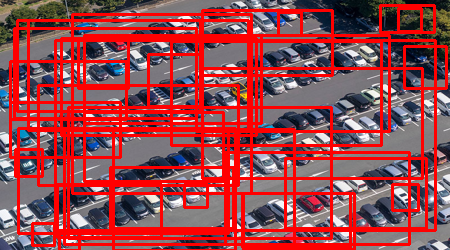

In [40]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

INI NEW CODES

In [41]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
from google.colab.patches import cv2_imshow

In [ ]:
img_car = '/content/drive/MyDrive/PCVK/CAR/20.jpg';
img = cv2.imread(img_car)
img2 = cv2.imread(img_car)
image_path = '/content/drive/MyDrive/PCVK Project/car_detec_img'
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
car_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK Project/cars6.xml')
cars = car_cascade.detectMultiScale(gray, 1.3, 5)

TRY YOLO

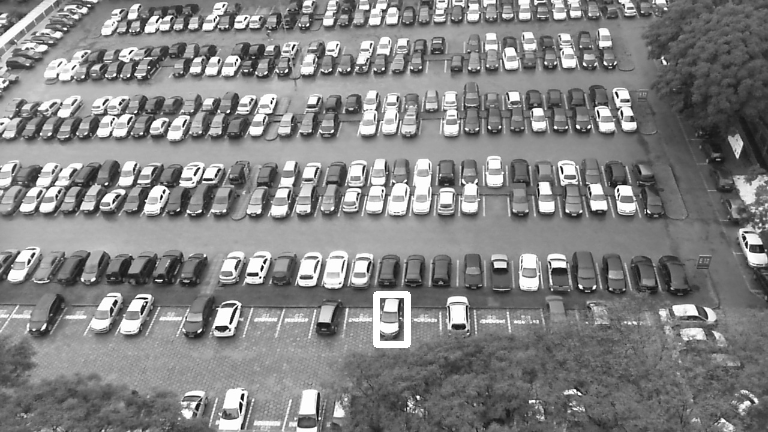

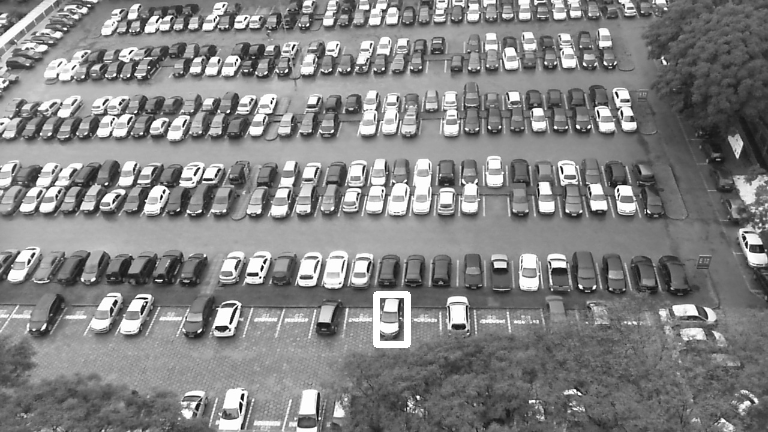

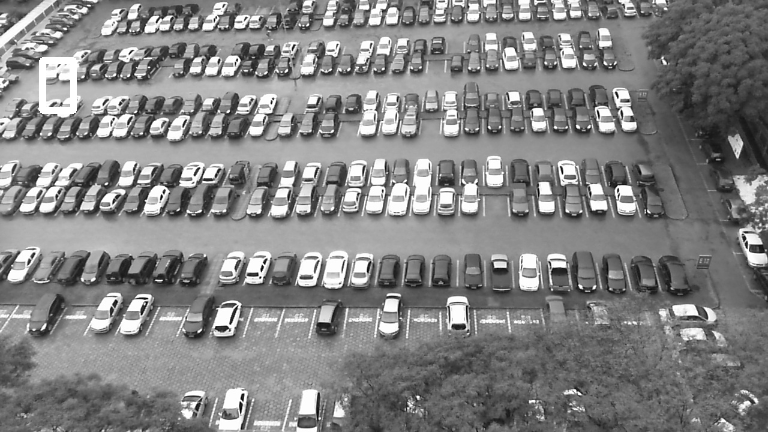

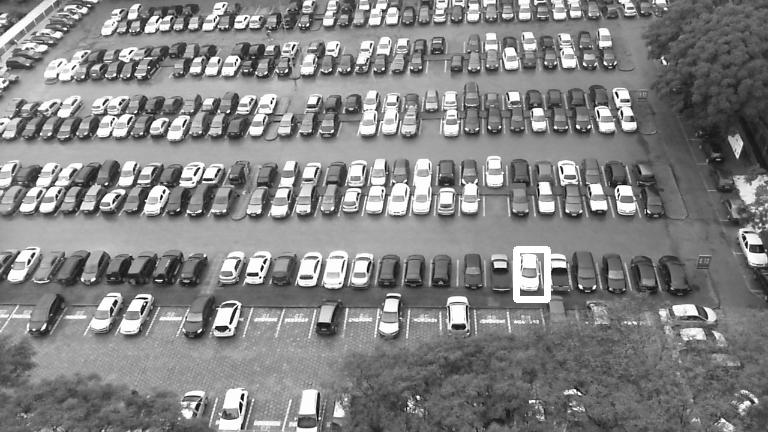

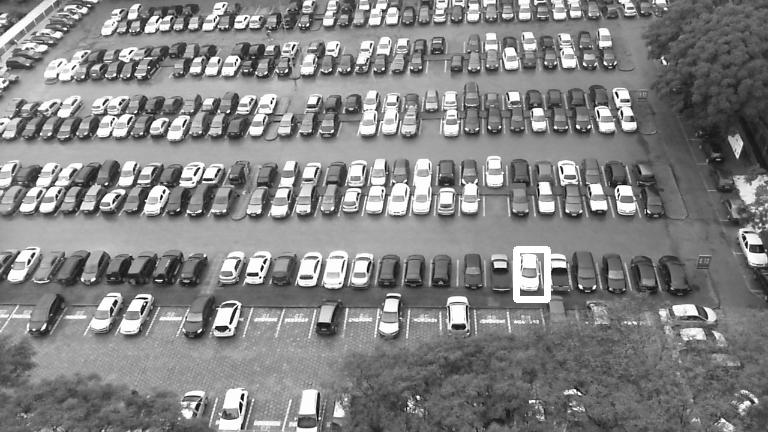

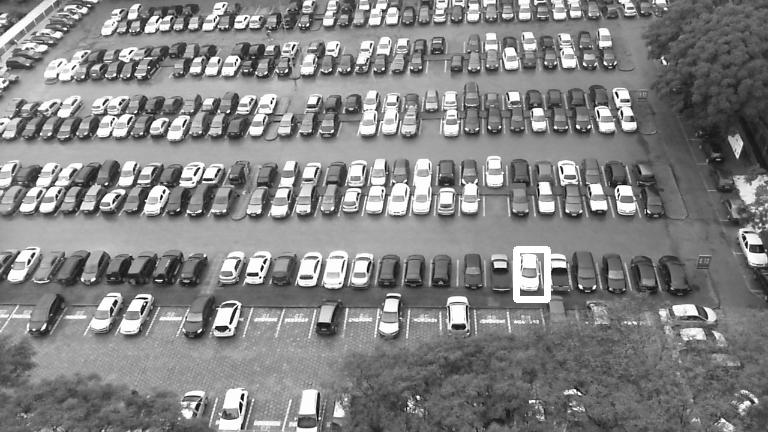

In [42]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.resize(cv2.imread('/content/drive/MyDrive/PCVK/CAR/20.jpg', 0), (0, 0), fx=0.6, fy=0.6)
template = cv2.resize(cv2.imread('/content/drive/MyDrive/PCVK/model/car-model.jpg', 0), (0, 0), fx=0.8, fy=0.8)
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)    
    cv2.rectangle(img2, location, bottom_right, 255, 5)
    cv2_imshow(img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

--2022-06-13 16:01:17--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  73.2MB/s    in 3.4s    

2022-06-13 16:01:21 (68.7 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-06-13 16:01:21--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s 

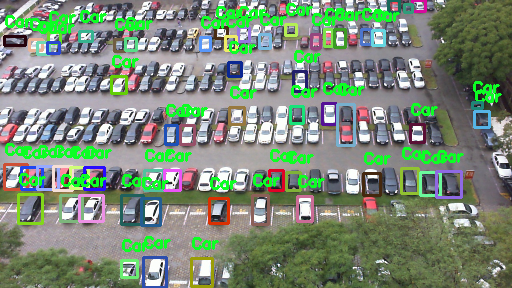

In [44]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread('/content/drive/MyDrive/PCVK/CAR/20.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Memberikan penjelasan yaitu tag "Car" kepada setiap objek yang berhasil dipindai
        cv2.putText(img, 'Car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()